# Trabajo Práctico 1 - Agrupamiento (Clustering)
## <center> Grupo 07 </center>
### <center> Integrantes: </center>
<center>

Leandro Elias Brizuela

José Rafael Patty Morales

Jesabel Pugliese

Candela Matelica
</center>

# Inicialización del entorno

In [ ]:
# Manipulación de datos y funciones matemáticas
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as psp
from IPython.display import display

# Importación de datos
import pyarrow.parquet as pq

# Modelo
!pip install pyclustertend
from pyclustertend import hopkins
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Guardar modelos
import joblib

# Eliminar warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Importación de datos

Se trabajará sobre un subconjunto de datos de *tracks* (canciones) de Spotify.

In [ ]:
df_spotify = pd.read_csv('/content/playlist_spotify.csv')

# Exploración de datos

In [ ]:
# Visualizamos la cantidad de filas y columnas del dataframe:

shape_base = df_spotify.shape
print("Cantidad de filas: ", shape_base[0])
print("Cantidad de columnas: ", shape_base[1])

Cantidad de filas:  750
Cantidad de columnas:  13


In [ ]:
# Visualizamos las distintas columnas del dataframe y su tipo de datos:

df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB


In [ ]:
# Visualizamos algunas filas del dataframe:

pd.concat([df_spotify.head(2), df_spotify.tail(2)])

acousticness  danceability  duration  energy  instrumentalness  key  \
0          0.7130         0.514    100125   0.521          0.816000    8   
1          0.1920         0.714    207019   0.614          0.000000    4   
748        0.1680         0.700    249493   0.823          0.000028    3   
749        0.0155         0.477    276720   0.776          0.003140    1   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0       0.112   -14.835     0       0.0444  119.879               4    0.143  
1       0.263    -6.935     1       0.0319  123.969               4    0.582  
748     0.122    -6.892     1       0.0373  144.060               4    0.745  
749     0.203    -5.056     1       0.0349  131.004               4    0.429

El objetivo del ejercicio es analizar si es posible agrupar los datos en función de algún criterio.

Tenemos las siguientes variables:  

- ***acousticness*** *(cuantitativa continua)*
- ***danceability*** *(cuantitativa continua)*
- ***duration*** *(cuantitativa discreta)*
- ***energy*** *(cuantitativa continua)*
- ***instrumentalness*** *(cuantitativa continua)*
- ***key*** *(categórica nominal)*
- ***liveness*** *(cuantitativa continua)*
- ***loudness*** *(cuantitativa continua)*
- ***mode*** *(categórica nominal)*
- ***speechiness*** *(cuantitativa continua)*
- ***tempo*** *(cuantitativa continua)*
- ***time_signature*** *(categórica ordinal)*
- ***valence*** *(cuantitativa continua)*

# Limpieza de los datos

## Tratamiento de valores atípicos

### Análisis univariado

Se construirán box plots por variable a fin de identificar y comparar la presencia de valores atípicos.  

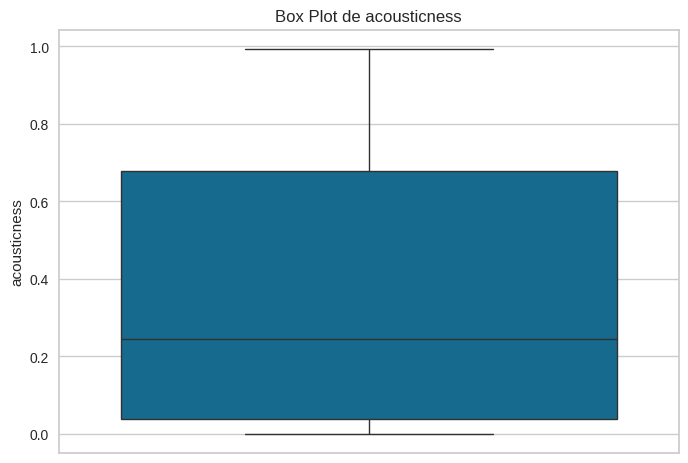

In [ ]:
# Graficamos el Box Plot de la variable acousticness:
sns.boxplot(
    data = df_spotify,
    y = 'acousticness'
).set(ylabel = "acousticness", title = "Box Plot de acousticness")
plt.show()

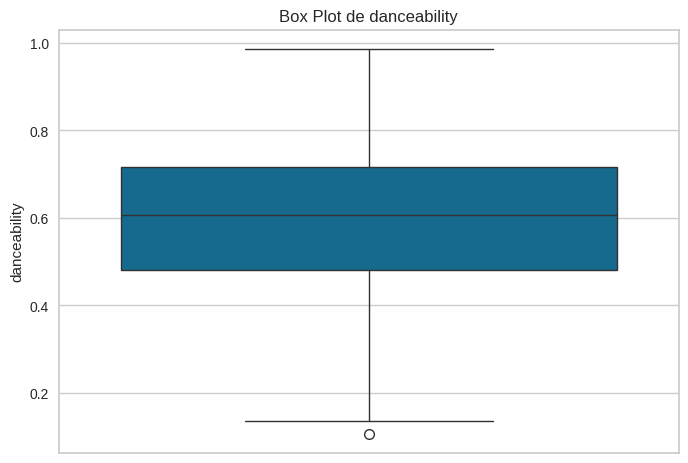

In [ ]:
# Graficamos el Box Plot de la variable danceability:
sns.boxplot(
    data = df_spotify,
    y = 'danceability'
).set(ylabel = "danceability", title = "Box Plot de danceability")
plt.show()

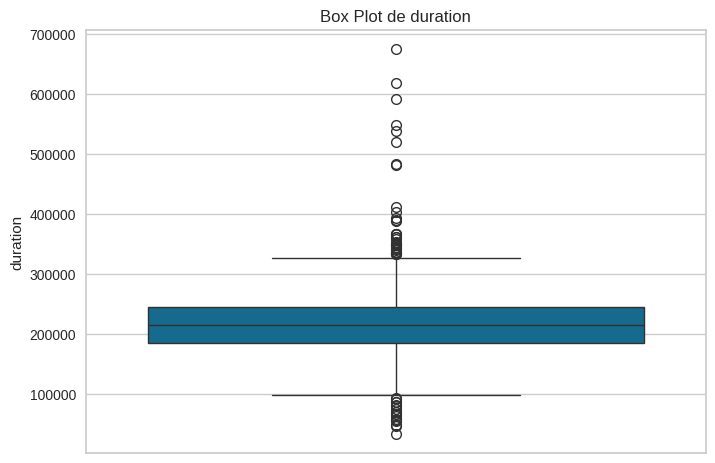

In [ ]:
# Graficamos el Box Plot de la variable duration:
sns.boxplot(
    data = df_spotify,
    y = 'duration'
).set(ylabel = "duration", title = "Box Plot de duration")
plt.show()

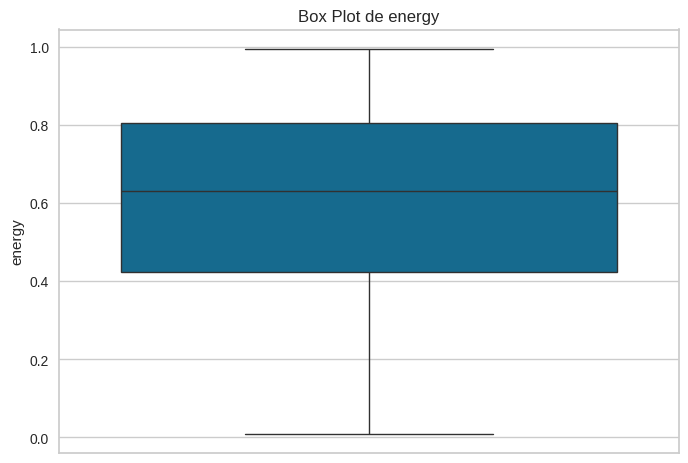

In [ ]:
# Graficamos el Box Plot de la variable energy:
sns.boxplot(
    data = df_spotify,
    y = 'energy'
).set(ylabel = "energy", title = "Box Plot de energy")
plt.show()

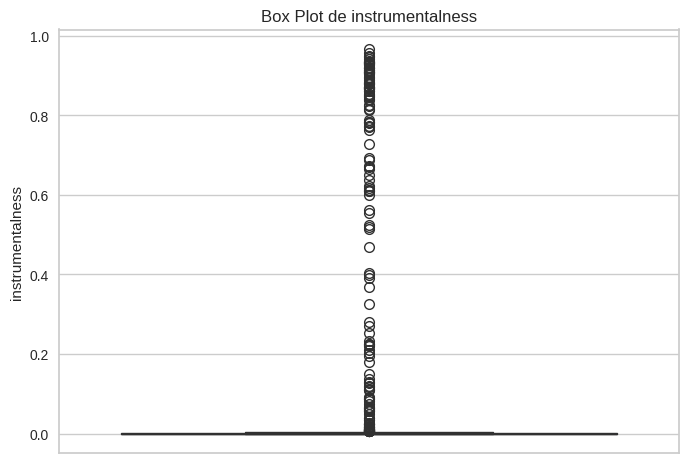

In [ ]:
# Graficamos el Box Plot de la variable instrumentalness:
sns.boxplot(
    data = df_spotify,
    y = 'instrumentalness'
).set(ylabel = "instrumentalness", title = "Box Plot de instrumentalness")
plt.show()

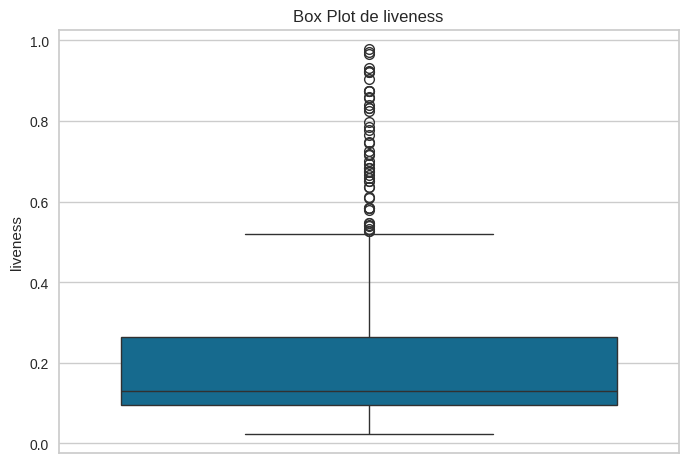

In [ ]:
# Graficamos el Box Plot de la variable liveness:
sns.boxplot(
    data = df_spotify,
    y = 'liveness'
).set(ylabel = "liveness", title = "Box Plot de liveness")
plt.show()

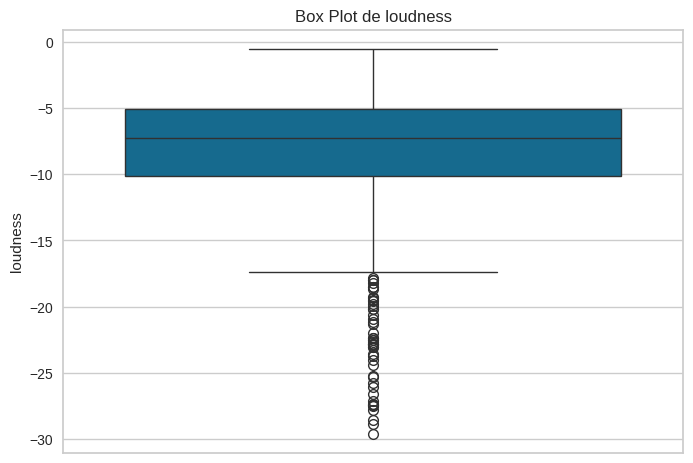

In [ ]:
# Graficamos el Box Plot de la variable loudness:
sns.boxplot(
    data = df_spotify,
    y = 'loudness'
).set(ylabel = "loudness", title = "Box Plot de loudness")
plt.show()

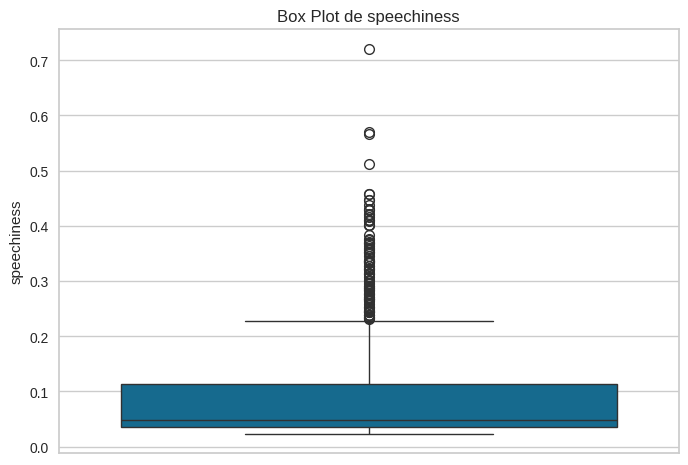

In [ ]:
# Graficamos el Box Plot de la variable speechiness:
sns.boxplot(
    data = df_spotify,
    y = 'speechiness'
).set(ylabel = "speechiness", title = "Box Plot de speechiness")
plt.show()

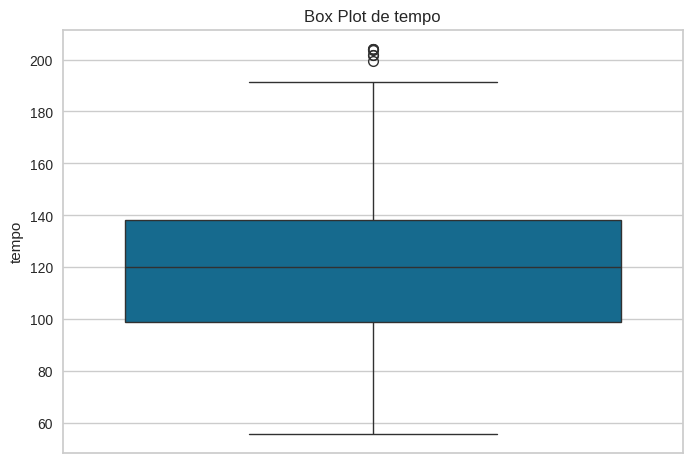

In [ ]:
# Graficamos el Box Plot de la variable tempo:
sns.boxplot(
    data = df_spotify,
    y = 'tempo'
).set(ylabel = "tempo", title = "Box Plot de tempo")
plt.show()

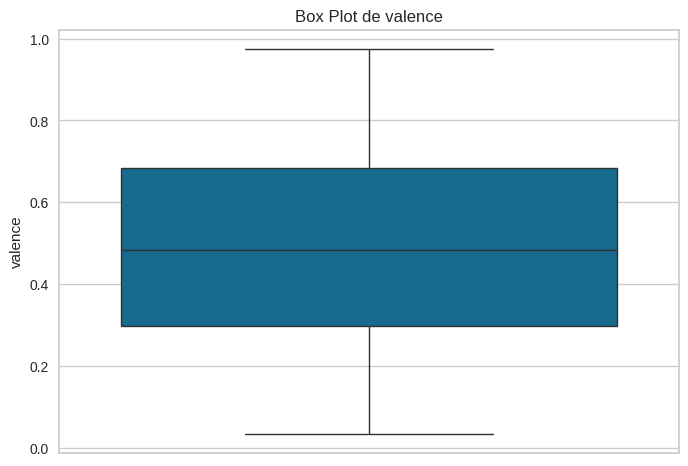

In [ ]:
# Graficamos el Box Plot de la variable valence:
sns.boxplot(
    data = df_spotify,
    y = 'valence'
).set(ylabel = "valence", title = "Box Plot de valence")
plt.show()

Como podemos observar en los gráficos, no hay valores atípicos univariados en el dataset, pues todos los datos toman valores esperados.

### Análisis multivariado

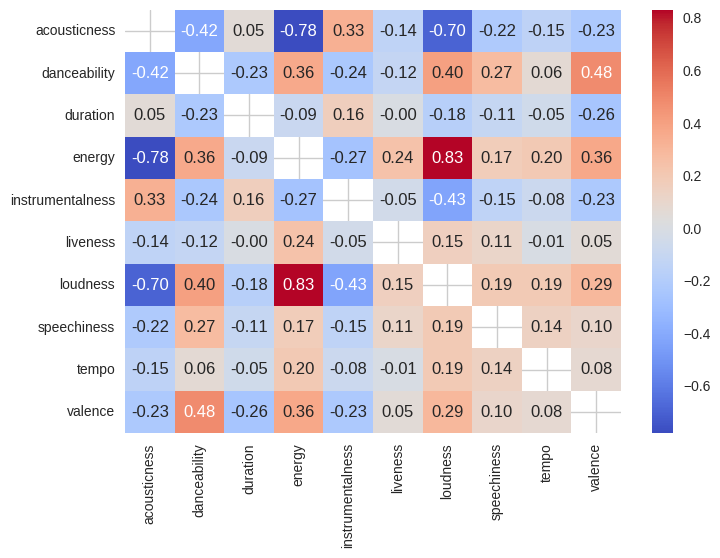

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Graficamos la Matriz de Correlación en un Heatmap

variables_cuantitativas = ["acousticness", "danceability", "duration", "energy",
                           "instrumentalness", "liveness", "loudness",
                           "speechiness", "tempo", "valence"]
df_spotify_cuantitativas = df_spotify[variables_cuantitativas]
matriz_correlacion = df_spotify_cuantitativas.corr(numeric_only=True)
diagonal = np.eye(len(matriz_correlacion), dtype=bool)
sns.heatmap(matriz_correlacion, mask=diagonal, annot=True, fmt=".2f", cmap='coolwarm')
plt.figure(figsize = (15,8))
plt.show()

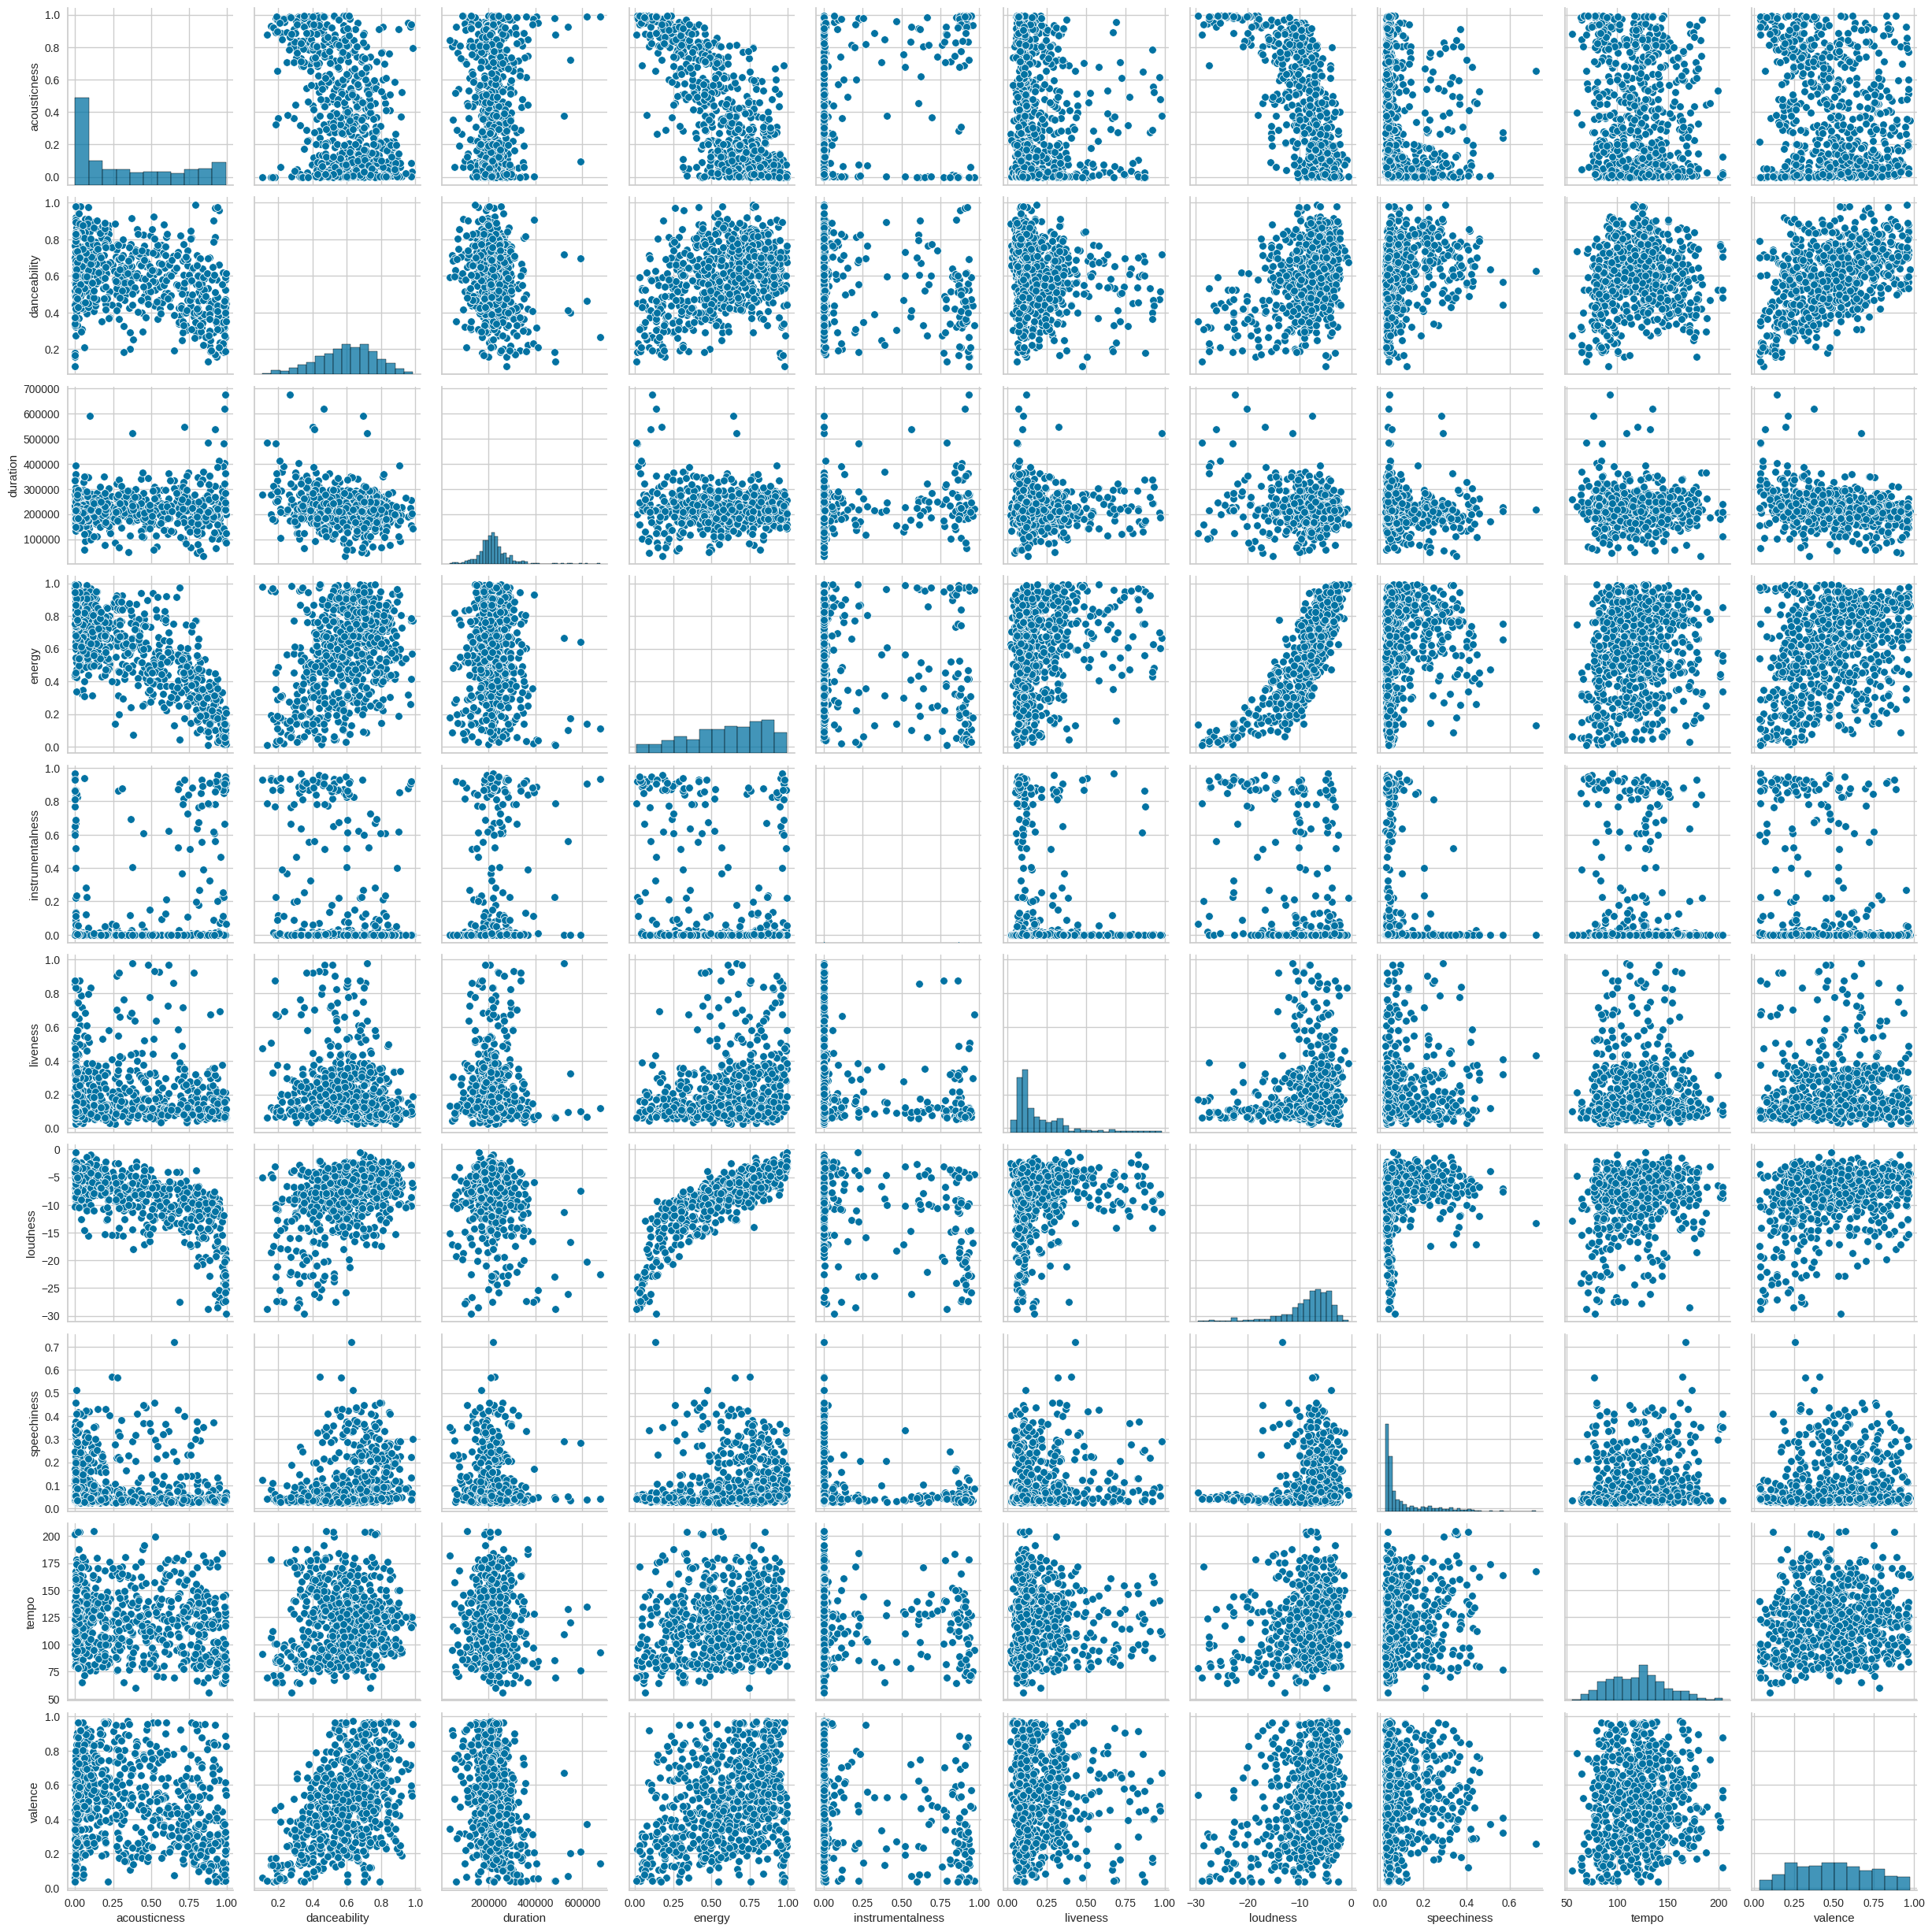

In [ ]:
# Realizamos un Pair Plot para analizar cómo se correlacionan las variables
sns.pairplot(df_spotify_cuantitativas)
plt.show()

Tras un análisis visual del gráfico no detectamos valores atípicos multivariados. Todos los valores se aproximan a la distribución de la mayoría.  

## Tratamiento de datos faltantes

In [ ]:
# Visualizamos la cantidad de datos nulos por columna en el dataframe:

print(df_spotify.isna().sum())

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


# Entrenamiento y predicción

### Transformación de los datos

#### Generación de nuevas variables

##### `duration`

Como la variable `duration`, que pide la duración de las canciones en milisegundos, puede tomar valores muy grandes, decidimos transformarla para que mida las canciones en minutos.  

In [ ]:
df_spotify["duration_min"] = df_spotify["duration"] / 60000
df_spotify.drop("duration", axis=1, inplace=True)
df_spotify.head(2)

acousticness  danceability  energy  instrumentalness  key  liveness  \
0         0.713         0.514   0.521             0.816    8     0.112   
1         0.192         0.714   0.614             0.000    4     0.263   

   loudness  mode  speechiness    tempo  time_signature  valence  duration_min  
0   -14.835     0       0.0444  119.879               4    0.143      1.668750  
1    -6.935     1       0.0319  123.969               4    0.582      3.450317

#### Encoding

Aplicamos One Hot Encoding en las variables categóricas para que puedan ser usadas correctamente en el modelo.

In [ ]:
df_spotify = pd.get_dummies(
    df_spotify, columns=["key", "mode", "time_signature"],
    drop_first=True
)
display(df_spotify.head(2))
print(df_spotify.shape)

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0         0.713         0.514   0.521             0.816     0.112   -14.835   
1         0.192         0.714   0.614             0.000     0.263    -6.935   

   speechiness    tempo  valence  duration_min  ...  key_6  key_7  key_8  \
0       0.0444  119.879    0.143      1.668750  ...  False  False   True   
1       0.0319  123.969    0.582      3.450317  ...  False  False  False   

   key_9  key_10  key_11  mode_1  time_signature_3  time_signature_4  \
0  False   False   False   False             False              True   
1  False   False   False    True             False              True   

   time_signature_5  
0             False  
1             False  

[2 rows x 25 columns]

(750, 25)


### a) Analizar la tendencia al clustering del dataset

Analizamos la tendencia al clustering mediante el estadístico de Hopkins.

In [ ]:
np.random.seed(1)
H = 1 - hopkins(df_spotify, df_spotify.shape[0])
print(f"Coeficiente de Hopkins: {H:.2f}")

Coeficiente de Hopkins: 0.74


Como $H \approx 0.74$, entonces hay una fuerte evidencia de estructura de clústeres, por lo que podemos agrupar los datos con algoritmos de clustering.

### b) Estimar la cantidad apropiada de grupos que se deben formar

Estimamos la cantidad apropiada de grupos que se deben formar mediante el análisis del coeficiente de Silhouette.

El número óptimo de clusters es: 3


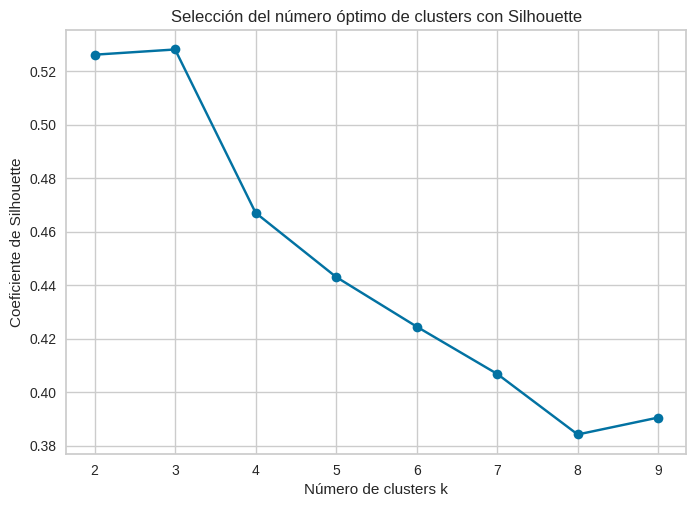

In [ ]:
# Probamos valores de K de 2 a 10
k_range = range(2, 10)
silhouette_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(df_spotify)
    score = silhouette_score(df_spotify, labels)
    silhouette_scores.append(score)

optimal_k = k_range[np.argmax(silhouette_scores)]

print(f"El número óptimo de clusters es: {optimal_k}")

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Número de clusters k")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Selección del número óptimo de clusters con Silhouette")
plt.xticks(np.arange(min(k_range), max(k_range)+1))
plt.show()

### c) Evaluar la calidad de los grupos formados realizando un análisis de Silhouette

Como el coeficiente de Silhouette varía mínimamente para $K=2$ y $K=3$, decidimos analizar la calidad de los grupos formados para estos dos valores de clusters.  

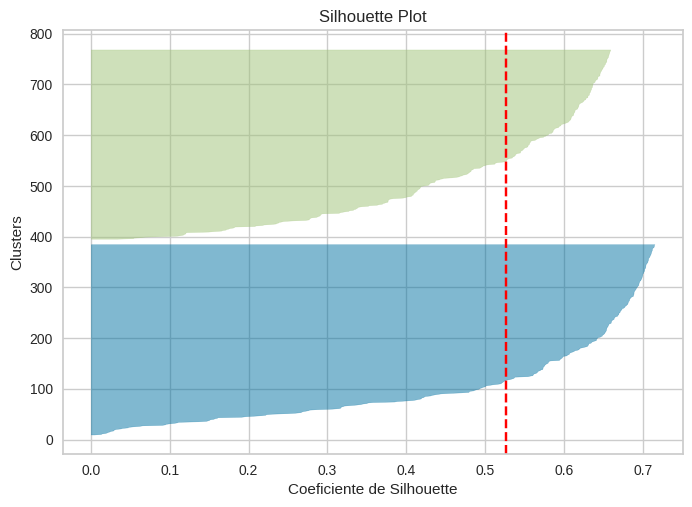

In [ ]:
km = KMeans(2, random_state=1)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_spotify)
plt.title("Silhouette Plot")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Clusters")
plt.show()

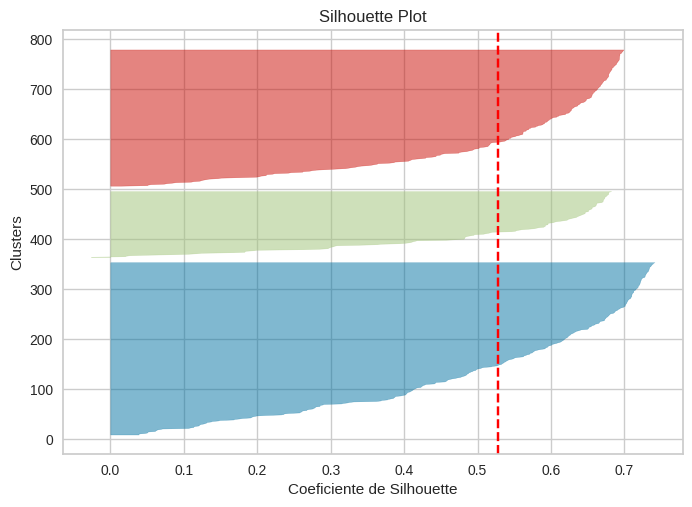

In [ ]:
km = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_spotify)
plt.title("Silhouette Plot")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Clusters")
plt.show()

Para $K=2$ y $K=3$ se observan bandas mayormente bien definidas, lo que indica que el clustering logra separar los datos en grupos claros.  
Para el caso de $K=3$ la mayoría de datos se concentran principalmente entre 2 clusters (indicado por las dos bandas más anchas), mientras que para $K=2$ los datos estan uniformemente dispersos entre los dos clusters (las dos bandas tienen ancho similiar). Esta uniformidad en la dispersión de los datos entre los clusters podría indicar que el valor óptimo para $K$ es $2$.  

In [ ]:
km = KMeans(2, random_state=1)
km.fit(df_spotify)
df_spotify["cluster"] = km.labels_

Además, la mayoría de los valores de Silhouette se encuentran por encima del valor promedio (línea roja). Como este valor es mayor a  $0.5$, entonces la calidad de la agrupación es alta: hay una buena separación entre los clusters, pues un silhouette cercano a  1  significa que los puntos están bien agrupados dentro de su cluster y lejos de los demás.

### d) Realizar un análisis de cada grupo intentando entender en función de qué características fueron formados

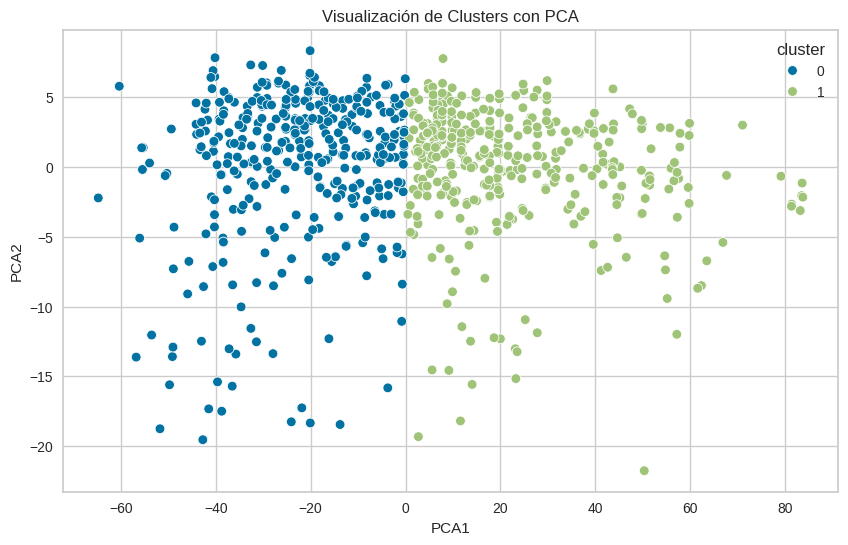

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_spotify.drop("cluster", axis=1))

pca_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])
pca_df["cluster"] = df_spotify["cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df)
plt.title("Visualización de Clusters con PCA")
plt.show()

In [ ]:
df_spotify["cluster"].value_counts()

cluster
0    376
1    374
Name: count, dtype: int64

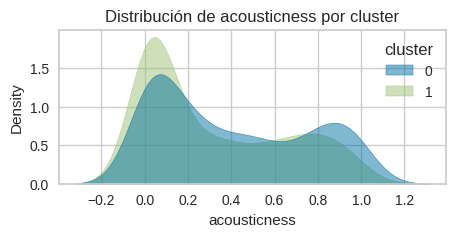

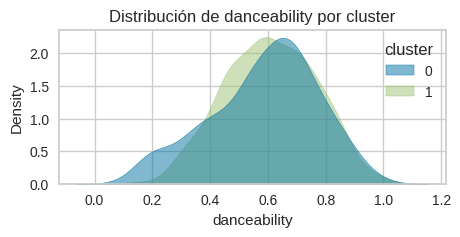

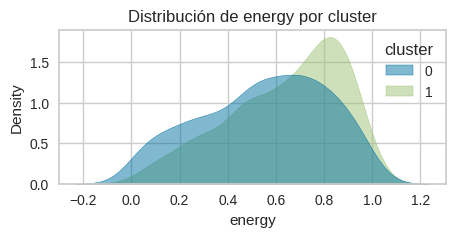

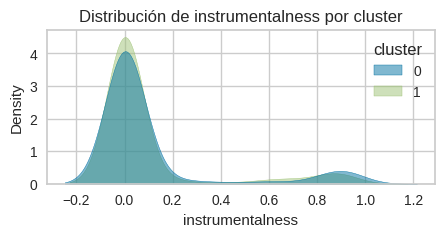

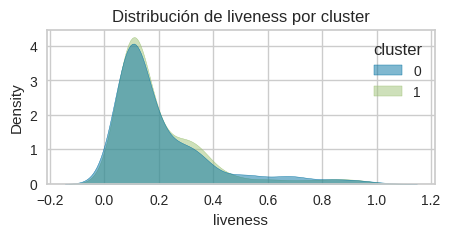

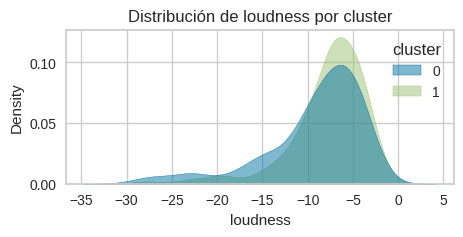

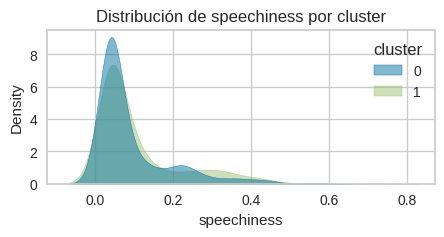

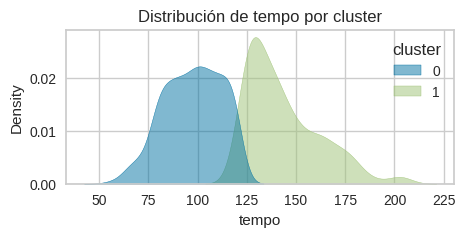

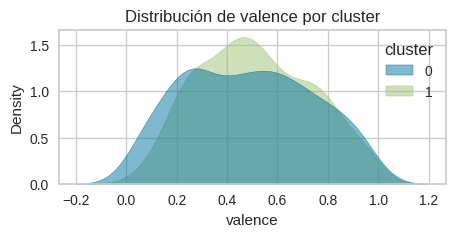

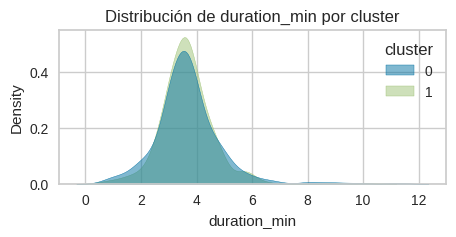

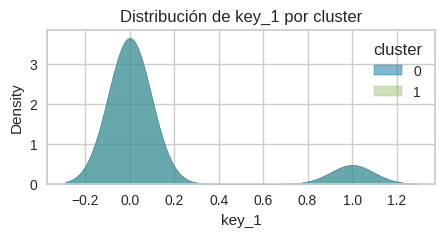

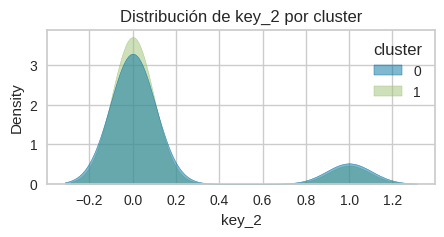

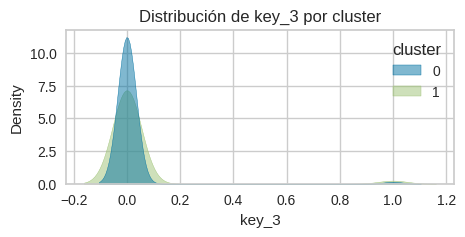

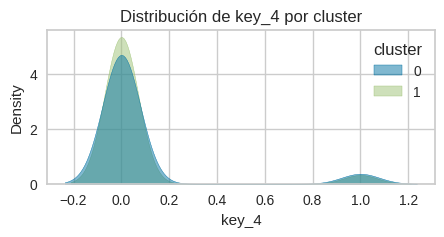

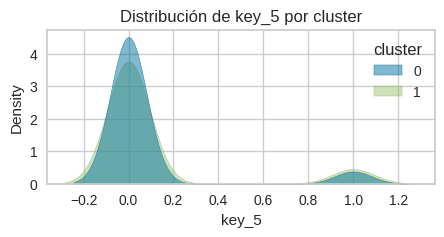

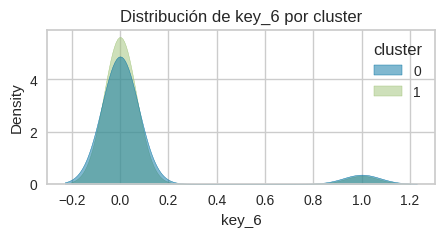

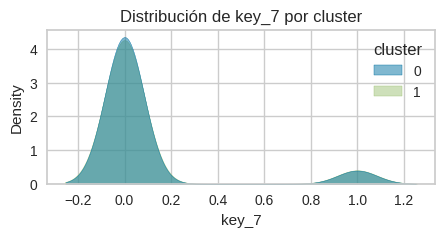

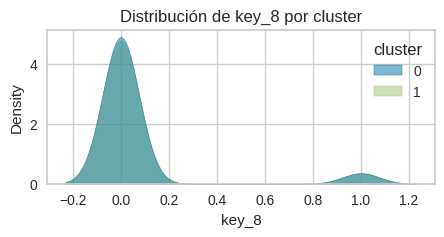

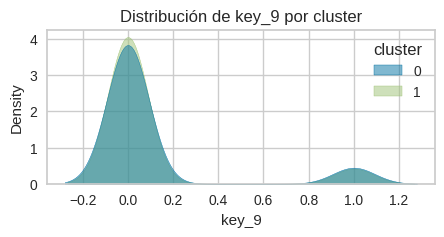

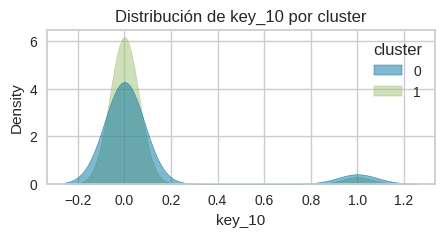

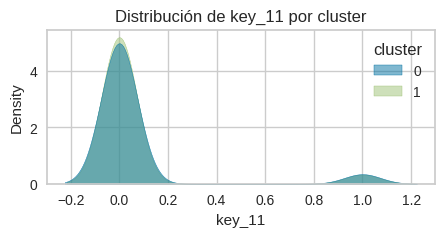

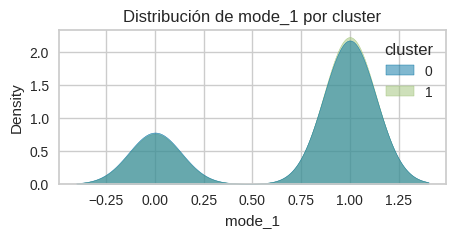

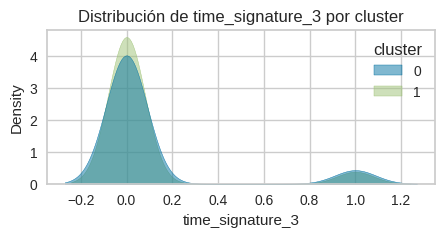

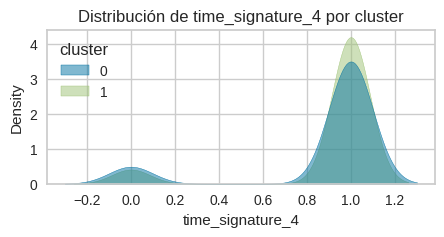

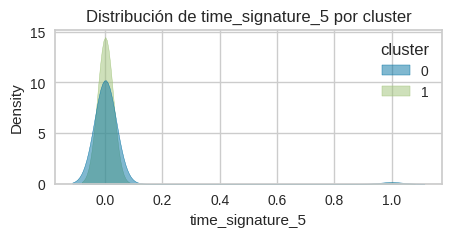

In [ ]:
for col in df_spotify.drop("cluster", axis=1).columns:
    plt.figure(figsize=(5,2))
    sns.kdeplot(data=df_spotify, x=col, hue="cluster", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribución de {col} por cluster")
    plt.show()

Para la mayoría de las variables los valores se distribuyen uniformemente entre los clusters, exceptuando para la variable `tempo`: los datos con tempos más bajos se concentraron en un cluster, mientras que los de tempos más altos en otro.

### Guardamos el modelo

In [ ]:
joblib.dump(km, 'km.joblib')

['km.joblib']